In [3]:
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../ch10')
from expressions import *

def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)

1.0045248555348174

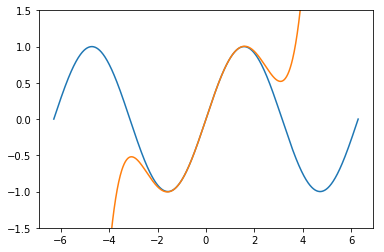

In [4]:
sin_taylor = lambda x: x - x**3/6 + x**5/120
plot_function(sin, -2*pi, 2*pi)
plot_function(sin_taylor, -2*pi, 2*pi)
plt.ylim(-1.5,1.5)
sin_taylor(pi/2)

In [5]:
for x in np.linspace(0.0,0.03,4):
    print("{} & {} \\\\".format(x,sin(x)))

0.0 & 0.0 \\
0.01 & 0.009999833334166664 \\
0.02 & 0.01999866669333308 \\
0.03 & 0.02999550020249566 \\


In [6]:
list(enumerate([1,1,1]))

[(0, 1), (1, 1), (2, 1)]

In [7]:
def fourier(a,b,l):
    def new_function(x):
        return sum([an*cos(2*pi*n*x/l) for (n,an) in enumerate(a)]) + sum([bn*sin(2*pi*(1+n)*x/l) for (n,bn) in enumerate(b)])
    return new_function

In [8]:
import random
# a = [random.uniform(-0.8**x,0.8**x) for x in range(0,20)]

# b = [random.uniform(-0.8**x,0.8**x) for x in range(0,20)]



In [9]:
plt.figure(figsize=(20,5))
plot_function(fourier(a,b,1),-3,3)
from math import factorial
def deriv(x):
    cum = sum(a)
    for i in range(1,30):
        series = a[1:] if i%2==0 else b
        coeff = sum([si * (n*2*pi)**i for (n,si) in enumerate(series)])*x**i / factorial(i)
        if i%4 == 2 or i%4 == 3:
            cum -= coeff
        else:
            cum += coeff
    return cum
#     return sum([
#         sum(a),
#         sum([n*2*pi*bi for (n,bi) in enumerate(b)])*x,
#         sum([(n*2*pi*ai)**2 for (n,ai) in enumerate(a)])*x**2 / 2,
#         sum([(n*2*pi*bi)**3 for (n,bi) in enumerate(b)])*x**3 / 6,
#         sum([(n*2*pi*ai)**4 for (n,ai) in enumerate(a)])*x**4 / 24,
#     ])
plot_function(deriv , -0.1, 0.1)
plt.ylim(-2.5,1.5)

TypeError: 'Variable' object is not iterable

<Figure size 1440x360 with 0 Axes>

In [10]:
a = [-0.8889621537422028,
 -0.382778033946636,
 -0.12455203740001097,
 -0.019261506987864885,
 -0.0775398227619023,
 -0.1361907694326888,
 -0.07247971894974667,
 -0.033947529604840904,
 0.10949152317004193,
 0.10356446821604409,
 0.0016063969087535823,
 -0.010504805779187373,
 0.008222225829893307,
 -0.04528113621939121,
 -0.01874908468290727,
 -0.0252901920758673,
 -0.004994049170581355,
 0.004499012691262454,
 0.017422531606983382,
 -0.007855027583960185]

In [11]:
b = [0.5389217396354149,
 -0.7010061773197649,
 -0.11488234085786309,
 0.38853917371053626,
 -0.2277060672761689,
 0.22504403555073127,
 -0.03286478044129007,
 0.026937833363616243,
 -0.012875697063047364,
 0.003679215509427708,
 0.07300717835956062,
 -0.018216960572456253,
 0.03322652172554716,
 0.0060635772389512135,
 -0.030883844184823404,
 -0.0002895274086497576,
 0.014143484802674824,
 0.016118113948970076,
 0.016487633523840462,
 -0.005129255761509403]

In [12]:
a

[-0.8889621537422028,
 -0.382778033946636,
 -0.12455203740001097,
 -0.019261506987864885,
 -0.0775398227619023,
 -0.1361907694326888,
 -0.07247971894974667,
 -0.033947529604840904,
 0.10949152317004193,
 0.10356446821604409,
 0.0016063969087535823,
 -0.010504805779187373,
 0.008222225829893307,
 -0.04528113621939121,
 -0.01874908468290727,
 -0.0252901920758673,
 -0.004994049170581355,
 0.004499012691262454,
 0.017422531606983382,
 -0.007855027583960185]

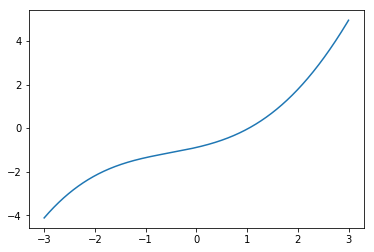

In [13]:
plot_function(lambda x: a[0] + b[0]*x - a[1]*x**2/2 - b[1]*x**3/6 + a[2]*x**4/24 + b[2]*x**5/120, -3,3)

In [14]:
fourier_series = Sum(
#     *[an*Cos(2*pi*n*Variable("x")) for (n,an) in enumerate(a)],
    *[bn*Sin(2*pi*(n+1)*Variable("x")) for (n,bn) in enumerate(b)])

In [15]:
sum(a)

-1.6035797099148086

In [16]:
fourier_series.derivative(x).evaluate(x=0)

AttributeError: 'numpy.float64' object has no attribute 'symbol'

In [17]:

f = fourier_series
coeffs = [f.evaluate(x=0)]
for i in range(0,4):
    f = f.derivative(x)
    coeffs.append(f.evaluate(x=0)/factorial(i))

AttributeError: 'numpy.float64' object has no attribute 'symbol'

In [18]:
coeffs

[0.0]

In [19]:
def taylor(coeffs):
    return lambda x: sum([c*x**i for (i,c) in enumerate(coeffs)])
        

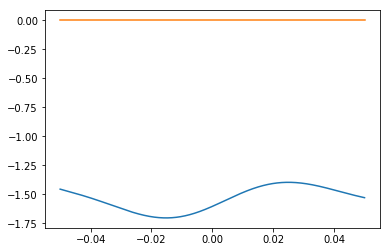

In [20]:
plot_function(fourier(a,b,1),-0.05, 0.05)
plot_function(taylor(coeffs),-0.05,0.05)

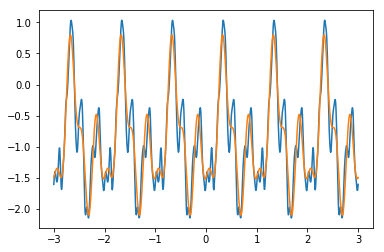

In [21]:
plot_function(fourier(a,b,1),-3,3)
plot_function(fourier(a[:5],b[:4],1),-3,3)

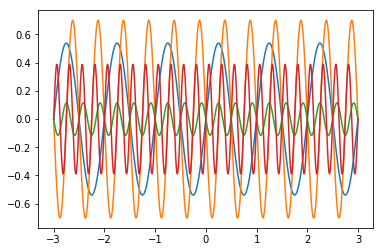

In [22]:
for i in range(0,4):
    plot_function(lambda y: fourier_series.exps[i].evaluate(x=y), -3,3)

NameError: name 'factorial' is not defined

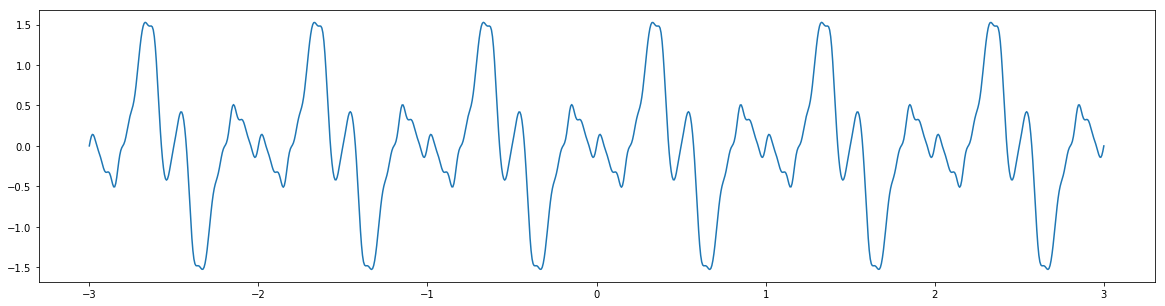

In [23]:

def get_taylor_coeffs(exp,n):
    res = []
    f= exp
    for i in range(0,n):
        res.append(f.evaluate(x=0) / factorial(i))
        f = f.derivative(x)
    return res

plt.figure(figsize=(20,5))

plot_function(fourier([],b,1), -3, 3)
# plot_function(taylor([fourier_series.evaluate(x=0),
#                       fourier_series.derivative(x).evaluate(x=0),
#                       fourier_series.derivative(x).derivative(x).evaluate(x=0)/2,
#                       fourier_series.derivative(x).derivative(x).derivative(x).evaluate(x=0)/6,
#                       fourier_series.derivative(x).derivative(x).derivative(x).derivative(x).evaluate(x=0)/24,
#                       fourier_series.derivative(x).derivative(x).derivative(x).derivative(x).derivative(x).evaluate(x=0)/120,
#                       fourier_series.derivative(x).derivative(x).derivative(x).derivative(x).derivative(x).derivative(x).evaluate(x=0)/720,
#                      ]),-0.1,0.1)

# plot_function(taylor(get_taylor_coeffs(fourier_series, 50)),-0.5,0.5)
plot_function(taylor(get_taylor_coeffs(fourier_series, 100)),-3,3)
plt.ylim(-2,2)

In [24]:
get_taylor_coeffs(fourier_series, 100)

NameError: name 'factorial' is not defined

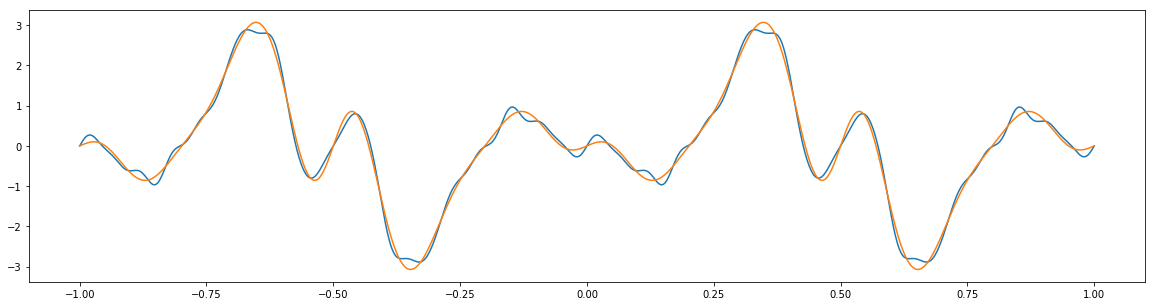

In [25]:
plt.figure(figsize=(20,5))

def normalize(f,l):
    norm = sum([f(i)**2 for i in np.linspace(0,l,1000)])/(1000*l)
    return lambda x: f(x)/norm
plot_function(normalize(fourier([],b,1),1), -1,1)
plot_function(normalize(fourier([],b[:10],1),1), -1,1)

In [26]:
plt.figure(figsize=(20,5))

# plot_function(lambda y: fourier_series.exps[1].evaluate(x=y), -3,3)
# plt.ylim(-0.75, 0.75)
# plot_function(lambda y: fourier_series.exps[2].evaluate(x=y), -3,3)
# plot_function(lambda y: fourier_series.exps[20].evaluate(x=y), -3,3)
# plot_function(lambda y: fourier_series.exps[21].evaluate(x=y), -3,3)
# plot_function(lambda y: fourier_series.exps[22].evaluate(x=y), -3,3)
# plot_function(lambda y: fourier_series.exps[23].evaluate(x=y), -3,3)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

(-0.75, 0.75)

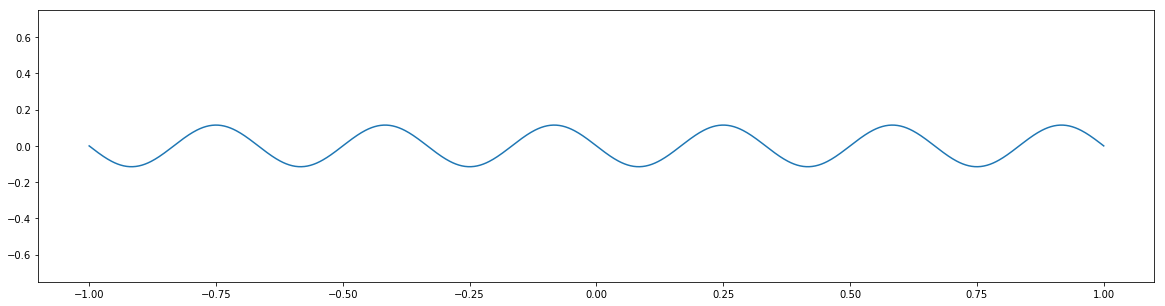

In [27]:
plt.figure(figsize=(20,5))

plot_function(lambda y: fourier_series.exps[2].evaluate(x=y), -1,1)
plt.ylim(-0.75, 0.75)

In [28]:
plt.figure(figsize=(20,5))

plot_function(lambda y: fourier_series.exps[20].evaluate(x=y), -1,1)
plt.ylim(-0.75, 0.75)

IndexError: tuple index out of range

<Figure size 1440x360 with 0 Axes>

(-0.75, 0.75)

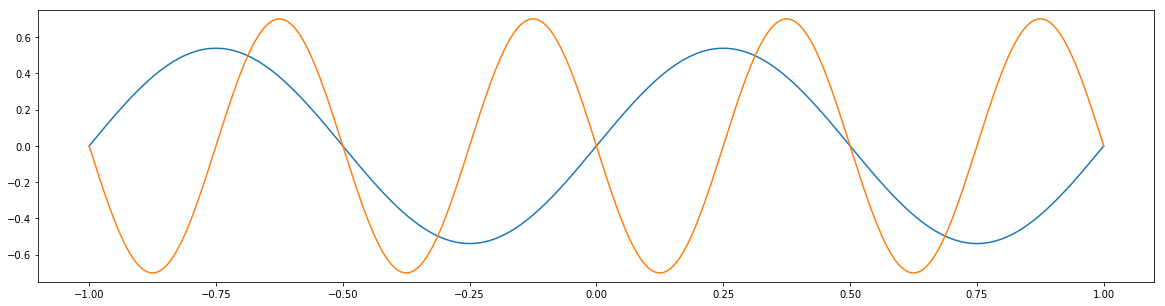

In [29]:
plt.figure(figsize=(20,5))
plot_function(lambda y: fourier_series.exps[0].evaluate(x=y), -1,1)
plot_function(lambda y: fourier_series.exps[1].evaluate(x=y), -1,1)
plt.ylim(-0.75, 0.75)

In [30]:
b[0]

0.5389217396354149

In [31]:
b[1]

-0.7010061773197649

In [32]:
a

[-0.8889621537422028,
 -0.382778033946636,
 -0.12455203740001097,
 -0.019261506987864885,
 -0.0775398227619023,
 -0.1361907694326888,
 -0.07247971894974667,
 -0.033947529604840904,
 0.10949152317004193,
 0.10356446821604409,
 0.0016063969087535823,
 -0.010504805779187373,
 0.008222225829893307,
 -0.04528113621939121,
 -0.01874908468290727,
 -0.0252901920758673,
 -0.004994049170581355,
 0.004499012691262454,
 0.017422531606983382,
 -0.007855027583960185]

In [42]:
def polynomial(variable, degree):
    terms = []
    for i in range(0,degree+1):
        coefficient = Variable("a_{{ {} }}".format(i))
        terms.append(coefficient * variable ** i)
    return Sum(*terms)
        
    
def is_number(n,exp):
    return isinstance(exp,Number) and exp.number == n
    
def simplify(exp):
    print("simplifying", exp.display())
    if isinstance(exp,Product):
        if is_number(1,exp.exp1):
            return simplify(exp.exp2)
        elif is_number(1,exp.exp2):
            return simplify(exp.exp1)
        else:
            return Product(simplify(exp.exp1),simplify(exp.exp2))
    elif isinstance(exp, Variable):
        return exp
    elif isinstance(exp, Number):
        return exp
    elif isinstance(exp, Sum):
        return Sum(*[simplify(e) for e in exp.exps])
    elif isinstance(exp, Power):
        if is_number(1,exp.exponent):
            return simplify(exp.base)
        elif is_number(0,exp.exponent):
            return Number(1)
        else:
            return Power(simplify(exp.base),simplify(exp.exponent))
    elif isinstance(exp, Apply):
        return Apply(exp.function,simplify(exp.argument))

In [43]:
x = Variable('x')
polynomial(x,10)

Sum(Product(Variable("a_{ 0 }"),Power(Variable("x"),Number(0))),Product(Variable("a_{ 1 }"),Power(Variable("x"),Number(1))),Product(Variable("a_{ 2 }"),Power(Variable("x"),Number(2))),Product(Variable("a_{ 3 }"),Power(Variable("x"),Number(3))),Product(Variable("a_{ 4 }"),Power(Variable("x"),Number(4))),Product(Variable("a_{ 5 }"),Power(Variable("x"),Number(5))),Product(Variable("a_{ 6 }"),Power(Variable("x"),Number(6))),Product(Variable("a_{ 7 }"),Power(Variable("x"),Number(7))),Product(Variable("a_{ 8 }"),Power(Variable("x"),Number(8))),Product(Variable("a_{ 9 }"),Power(Variable("x"),Number(9))),Product(Variable("a_{ 10 }"),Power(Variable("x"),Number(10))))

In [47]:
simplify(polynomial(x,2).derivative(x))

simplifying Sum(Product(Variable("a_{ 0 }"),Product(Number(1),Product(Number(0),Power(Variable("x"),Number(-1))))),Product(Variable("a_{ 1 }"),Product(Number(1),Product(Number(1),Power(Variable("x"),Number(0))))),Product(Variable("a_{ 2 }"),Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1))))))
simplifying Product(Variable("a_{ 0 }"),Product(Number(1),Product(Number(0),Power(Variable("x"),Number(-1)))))
simplifying Variable("a_{ 0 }")
simplifying Product(Number(1),Product(Number(0),Power(Variable("x"),Number(-1))))
simplifying Product(Number(0),Power(Variable("x"),Number(-1)))
simplifying Number(0)
simplifying Power(Variable("x"),Number(-1))
simplifying Variable("x")
simplifying Number(-1)
simplifying Product(Variable("a_{ 1 }"),Product(Number(1),Product(Number(1),Power(Variable("x"),Number(0)))))
simplifying Variable("a_{ 1 }")
simplifying Product(Number(1),Product(Number(1),Power(Variable("x"),Number(0))))
simplifying Product(Number(1),Power(Variable("x"),Number(0)))


Sum(Product(Variable("a_{ 0 }"),Product(Number(0),Power(Variable("x"),Number(-1)))),Product(Variable("a_{ 1 }"),Number(1)),Product(Variable("a_{ 2 }"),Product(Number(2),Variable("x"))))

In [49]:
simplify(x*1)

simplifying Product(Variable("x"),Number(1))
simplifying Variable("x")


Variable("x")

In [ ]:
solveset()